# Example of L1C file reader

## Load the library

In [14]:
# automatic reload option for IPython
from IPython import get_ipython
ipython = get_ipython()
if '__IPYTHON__' in globals():
    ipython.magic('load_ext autoreload')
    ipython.magic('autoreload 2')

# from src.nasa_pace_data_reader import L1
from nasa_pace_data_reader import L1
from nasa_pace_data_reader import plot
import numpy as np
from matplotlib import pyplot as plt
from netCDF4 import Dataset
import importlib

### Read the netCDF4 file

Specify the filename and location of netCDF file

In [15]:
# reload the module (This is needed only if the module is changed)(used for debugging and development)
importlib.reload(L1)

# Location of the file
fileName = '/Users/aputhukkudy/Downloads/PACE_HARP2.20220321T101844.L1C.5.2KM.V03.SIM2.1_.nc'

# Read the file
l1c = L1.L1C()
l1c_dict = l1c.read(fileName)

# Print the keys and the shape of the data
[print('{:>24}: {}'.format(key, l1c_dict[key].shape)) for key in l1c_dict.keys()][0]

Reading HARP2 data from /Users/aputhukkudy/Downloads/PACE_HARP2.20220321T101844.L1C.5.2KM.V03.SIM2.1_.nc
                latitude: (395, 519)
               longitude: (395, 519)
        scattering_angle: (395, 519, 90)
      solar_zenith_angle: (395, 519, 90)
     solar_azimuth_angle: (395, 519, 90)
     sensor_zenith_angle: (395, 519, 90)
    sensor_azimuth_angle: (395, 519, 90)
                       i: (395, 519, 90, 1)
                       q: (395, 519, 90, 1)
                       u: (395, 519, 90, 1)
                    dolp: (395, 519, 90, 1)


### Plotting the 'I'

In this section we have shown an example of plotting 'i'

setting dpi to 256 ppi
Band set to nir


/Users/aputhukkudy/git/nasa-pace-data-reader/Examples/nasa_pace_data_reader/plot.py:118: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(3, 2))


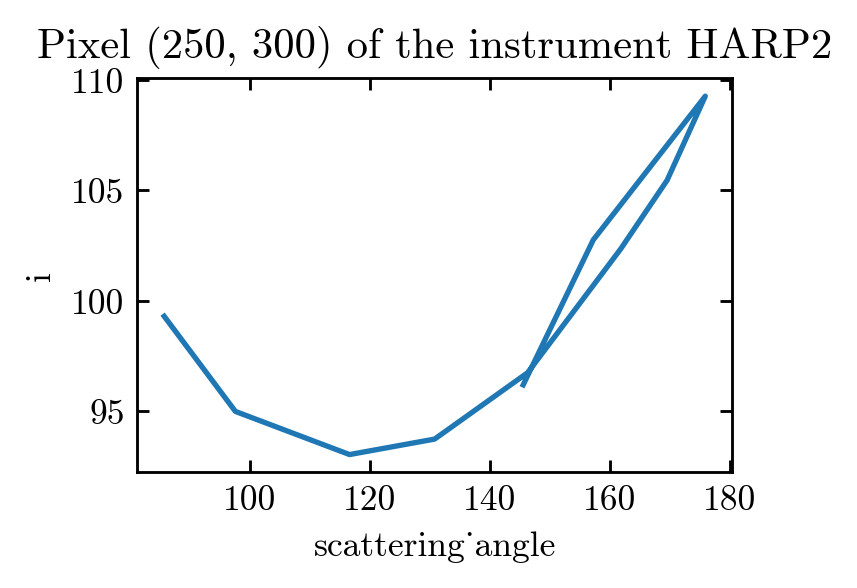

In [16]:
# reload the module (This is needed only if the module is changed)(used for debugging and development)
importlib.reload(plot)

pixel = [250,300]

# Load the plot class
plt_ = plot.Plot(l1c_dict)

# Set the dpi
plt_.setDPI(256)

# set which band to plot
band = 'NIR'
plt_.setBand(band)

# Plot the pixel
plt_.plotPixel(pixel[0], pixel[1])


#### Plot all bands and variables

An example to plot all variables and bands of the instrument defined

Instrument set to HARP2
...Setting the subplots with number of bands 4 and number of variables 4


/Users/aputhukkudy/git/nasa-pace-data-reader/Examples/nasa_pace_data_reader/plot.py:144: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig_, ax_ = plt.subplots(nrows = len(self.vars2plot),


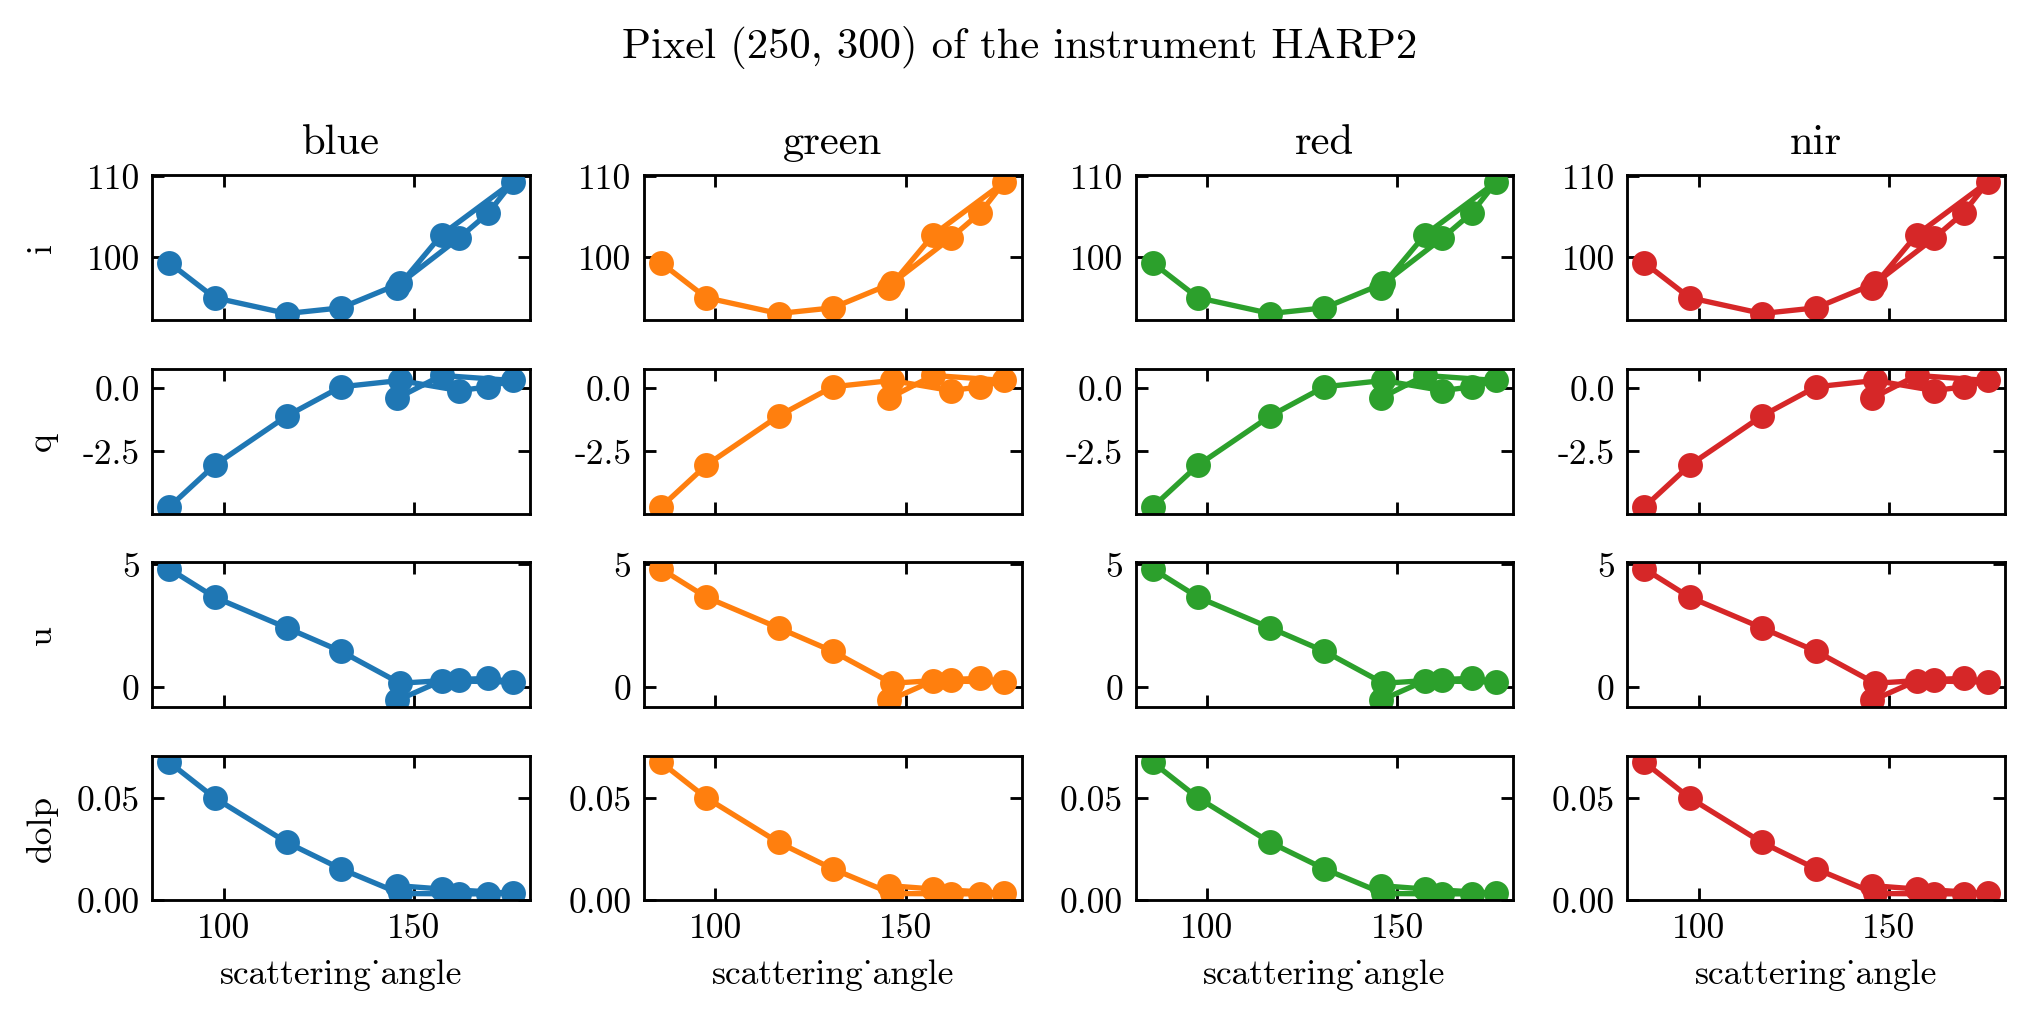

In [17]:
# define the wavelengths and variables to plot
plt_.setInstrument()

# plot all vars and bands
plt_.plotPixelVars(pixel[0], pixel[1])

#### Plot pixel data with selected bands and variables
Here we will show how to plot only selected bands and variables

...Setting the subplots with number of bands 2 and number of variables 3


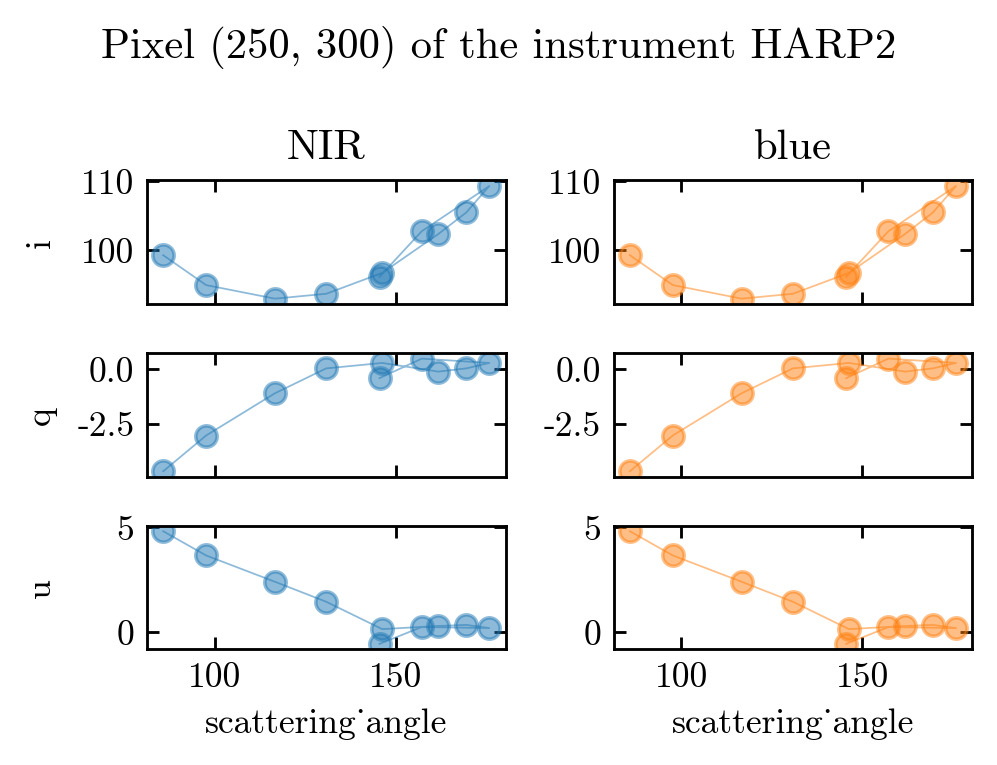

In [18]:

# plot only specific bands and vars
plt_.vars2plot = ['i', 'q', 'u']    # Order in the list is the order of plotting
plt_.bands2plot = ['NIR', 'blue']   # Order in the list is the order of plotting

# plot 
plt_.plotPixelVars(pixel[0], pixel[1], bands= plt_.bands2plot, alpha=0.5, linewidth=0.5) # you can pass any other arguments to the plot function